## Bus Stop Accessibility Analysis

Access to public transport is a key component of sustainable and equitable transport systems. 
In UK transport planning, walkable access to bus stops is commonly assessed using distance-based 
thresholds that approximate walking time.

This notebook estimates **walkable access to bus stops in Dartford, Kent**, using buffer analysis 
around bus stop locations. Two commonly used thresholds are applied:

- **400 metres** – approximately a 5-minute walk  
- **800 metres** – approximately a 10-minute walk  

The resulting coverage areas provide an initial indication of which parts of Dartford are well 
served by bus stops and which areas may experience reduced accessibility.

This analysis builds on the cleaned and processed datasets prepared in Notebook 1.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load Dartford boundary
dartford_boundary = gpd.read_file(
    "../data/raw/dartford_boundary/dartford_boundary.geojson"
)

# Load processed bus stop data
bus_stops = gpd.read_file(
    "../data/processed/bus_stops_dartford_clean.geojson"
)

# Check CRS
dartford_boundary.crs, bus_stops.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

### Coordinate Reference System

Buffer distances must be calculated in metres.  
Both datasets are therefore reprojected to **British National Grid (EPSG:27700)**, 
which is the standard projected CRS for spatial analysis in Great Britain.


In [3]:
dartford_boundary = dartford_boundary.to_crs(epsg=27700)
bus_stops = bus_stops.to_crs(epsg=27700)

dartford_boundary.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [4]:
# Create 400m and 800m buffers around bus stops
buffer_400m = bus_stops.copy()
buffer_400m["geometry"] = buffer_400m.geometry.buffer(400)

buffer_800m = bus_stops.copy()
buffer_800m["geometry"] = buffer_800m.geometry.buffer(800)

In [5]:
# Dissolve overlapping buffers
buffer_400m_dissolved = buffer_400m.dissolve()
buffer_800m_dissolved = buffer_800m.dissolve()

# Clip buffers to Dartford boundary
buffer_400m_clip = gpd.clip(buffer_400m_dissolved, dartford_boundary)
buffer_800m_clip = gpd.clip(buffer_800m_dissolved, dartford_boundary)

C:\Users\akua4\AppData\Local\Temp\ipykernel_11576\3455578228.py:33: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


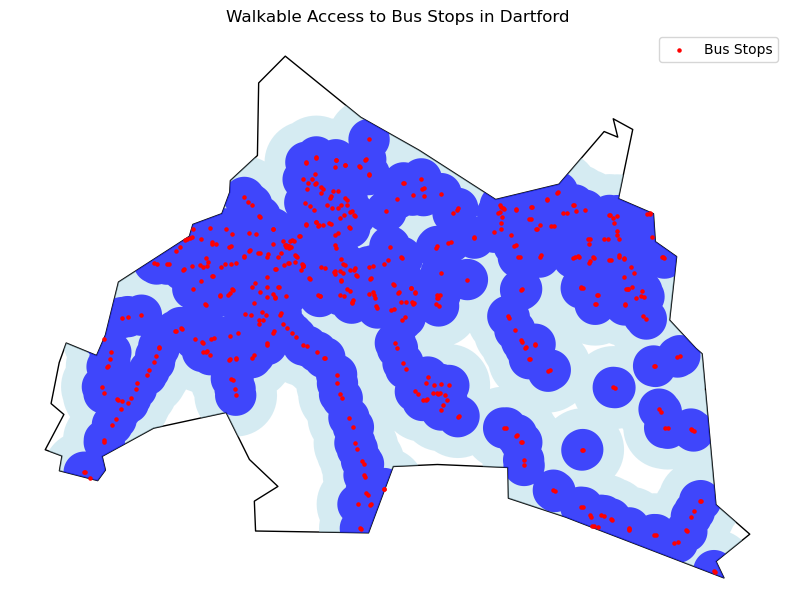

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

dartford_boundary.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=1
)

buffer_800m_clip.plot(
    ax=ax,
    color="lightblue",
    alpha=0.5,
    label="800m walk"
)

buffer_400m_clip.plot(
    ax=ax,
    color="blue",
    alpha=0.7,
    label="400m walk"
)

bus_stops.plot(
    ax=ax,
    color="red",
    markersize=5,
    label="Bus Stops"
)

ax.set_title("Walkable Access to Bus Stops in Dartford")
ax.axis("off")
ax.legend()

plt.show()

### Interpretation

The map shows the spatial extent of walkable access to bus stops across Dartford. 
Areas covered by the 400m buffers represent locations within a short walking distance 
of bus services, while the 800m buffers indicate broader accessibility.

Initial observations suggest that bus stop coverage is concentrated along key transport 
corridors, with some peripheral areas exhibiting reduced walkable access. These spatial 
patterns will be examined further in subsequent aalysis.


In [7]:
# Save accessibility layers
buffer_400m_clip.to_file(
    "../data/processed/bus_stop_access_400m.geojson",
    driver="GeoJSON"
)

buffer_800m_clip.to_file(
    "../data/processed/bus_stop_access_800m.geojson",
    driver="GeoJSON"
)